In [1]:
from SymbolicMutualInformation import get_MI
import matplotlib.pyplot as plt
import numpy as np
import csv
%matplotlib inline

Importing the function getMI for symbols at distance n, as defined in the paper: http://iopscience.iop.org/article/10.1209/0295-5075/26/4/001/meta
$$I(n)=\sum_{A_i,A_j}p^{(n)}(A_i,A_j)\log\Big[\frac{p^{(n)}(A_i,A_j)}{p^{(1)}(A_i)p^{(1)}(A_j)}\Big]$$
where
* $p^{(n)}(A_1,A_2,...,A_n)$ is the probability of the substring (block) $A_1,A_2,...,A_n$
* $p^{(n)}(A_1,A_n)$ is the probability of finding a pair $A_1$, $A_n$ in the total string with arbitrary $(n-2)$ letters in the middle 

I compute the $p^{(1)}(A_i)$ as the frequency of the letter $A_i$ in the entire sequence over the length of the sequence $L$: $$p^{(1)}(A_i)={f_{A_i}\over L}$$
while for the joint $p^{(n)}(A_i,A_j)$ I count the frequency of the pair $(A_i,A_j)$ at distance $n$. So I count how many times, given a $A_{i}$ in the sequence I find the $A_j$ after $n$ steps, and this will be the numerator. The denominator is how many windows of length $n$ I have in the sequence, which is $L-n$.

# Example on The Silmarillion

In [2]:
sequence = []
with open('tolkien.txt', 'r') as f:
    for line in f.readlines():
        sequence.append(line[:-2])

print len(sequence), sequence[:10]

681452 ['The', 'Music', 'of', 'the', 'Ainur', 'There', 'was', 'Eru', 'the', 'One']


In [3]:
#reducing the size
sequence = sequence[:2000]

Computing the MI for a bunch of $n$

In [4]:
n = np.arange(2,20,2)
I = [get_MI(sequence, x) for x in n]

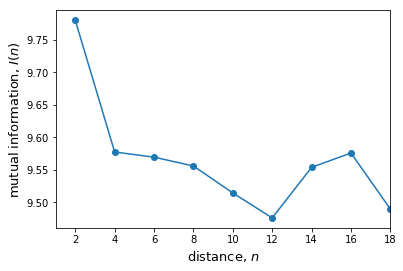

In [5]:
ax = plt.subplot(111)

ax.plot(n, I, 'o-')

ax.set_xlabel(ur'distance, $n$', size=13)
ax.set_ylabel(ur'mutual information, $I(n)$', size=13)
ax.set_xlim(min(n)-1, max(n));